#Prediction Real Estate in Taipei - Hanif Nur Aditya

This file explain about model prediction Real Estate price in Taipei Taiwan. Created using python programing language using regression model.

Made by Hanif Nur Aditya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
%pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

In [ ]:
"https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set"
"https://archive.ics.uci.edu/dataset/360/air+quality"
"https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength"

'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength'

In [ ]:
feat = real_estate_valuation.data.features
tar = real_estate_valuation.data.targets
df = pd.concat([pd.DataFrame(feat), pd.DataFrame(tar)], axis=1)
df = df.rename(columns={"X1 transaction date": "transaction", "X2 house age": "age", "X3 distance to the nearest MRT station": "distance", "X4 number of convenience stores": "stores", "X5 latitude": "lat", "X6 longitude": "lon", "Y house price of unit area": "price"})
df.head()


,transaction,age,distance,stores,lat,lon,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Exploring Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   transaction  414 non-null    float64
 1   age          414 non-null    float64
 2   distance     414 non-null    float64
 3   stores       414 non-null    int64  
 4   lat          414 non-null    float64
 5   lon          414 non-null    float64
 6   price        414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [ ]:
df.drop(['transaction'], axis=1, inplace=True)

In [ ]:
#convert price to actual price NTD
#df['price'] = df['price'] * 10_000

In [ ]:
df[['age', 'distance', 'stores', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,414.0,17.712560,11.392485,0.00000,9.0250,16.1000,28.150,43.800
distance,414.0,1083.885689,1262.109595,23.38284,289.3248,492.2313,1454.279,6488.021
stores,414.0,4.094203,2.945562,0.00000,1.0000,4.0000,6.000,10.000
price,414.0,37.980193,13.606488,7.60000,27.7000,38.4500,46.600,117.500


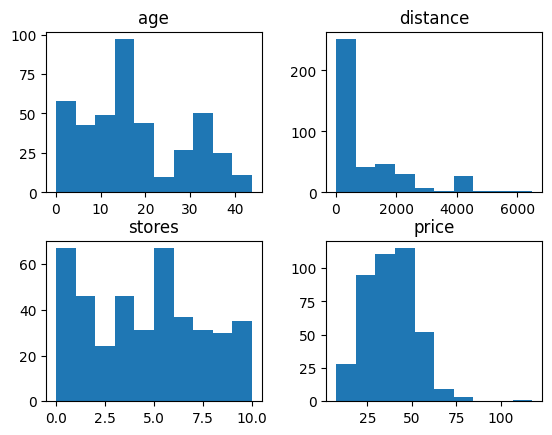

In [ ]:
df[['age', 'distance', 'stores', 'price']].hist(grid=False);

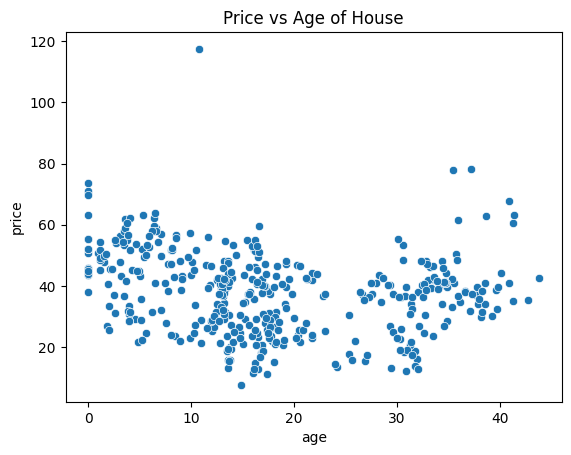

In [ ]:
sns.scatterplot(x='age', y='price', data=df)
plt.title("Price vs Age of House");

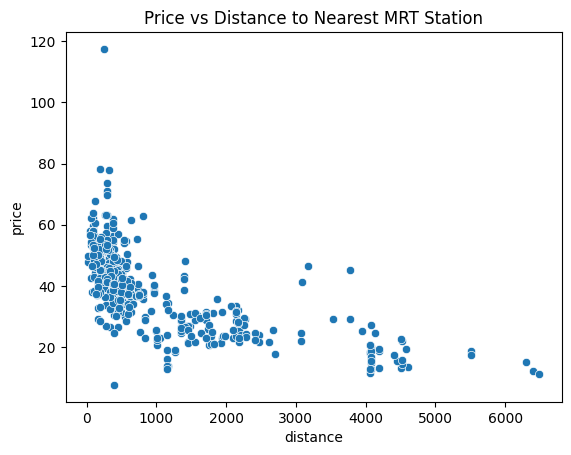

In [ ]:
sns.scatterplot(x='distance', y='price', data=df)
plt.title("Price vs Distance to Nearest MRT Station");

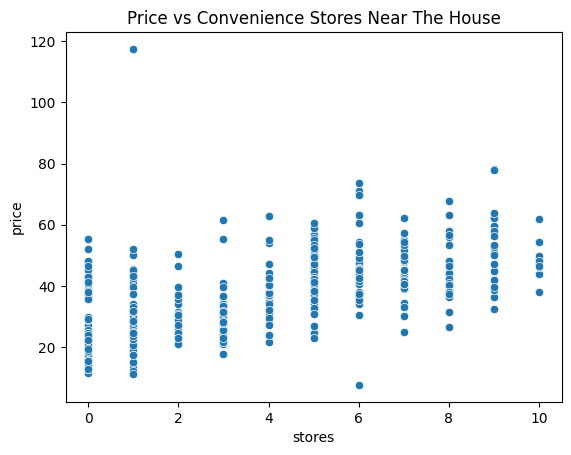

In [ ]:
sns.scatterplot(x='stores', y='price', data=df)
plt.title("Price vs Convenience Stores Near The House");

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='lat', y='lon', z='price', color='price', width=600, height=600, title="Price vs Latitude & Longitude")
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)
fig.show()

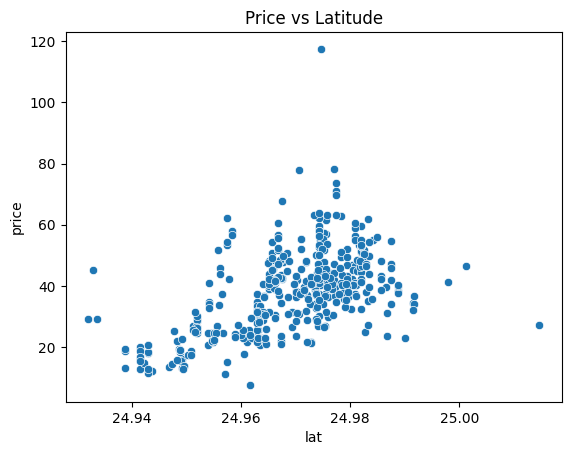

In [ ]:
sns.scatterplot(x='lat', y='price', data=df)
plt.title("Price vs Latitude");

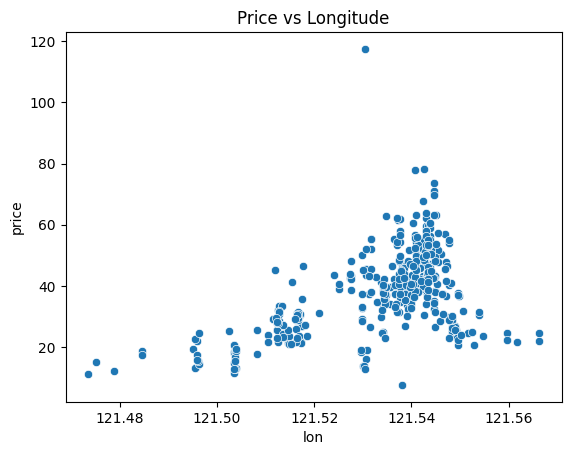

In [ ]:
sns.scatterplot(x='lon', y='price', data=df)
plt.title("Price vs Longitude");

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color="price",
    hover_data=["price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [ ]:
correlation = df[['age', 'distance', 'stores', 'lat', 'lon']].corr()
correlation.style.background_gradient(cmap='coolwarm')

,age,distance,stores,lat,lon
age,1.000000,0.025622,0.049593,0.054420,-0.048520
distance,0.025622,1.000000,-0.602519,-0.591067,-0.806317
stores,0.049593,-0.602519,1.000000,0.444143,0.449099
lat,0.054420,-0.591067,0.444143,1.000000,0.412924
lon,-0.048520,-0.806317,0.449099,0.412924,1.000000


### Plot Function

In [ ]:
def KDEplot(y_test, y_test_pred, title):
  sns.kdeplot(y_test, color='green', label="Actual")
  sns.kdeplot(y_test_pred, color='red', label="Prediction")
  plt.title(f"KDE Plot: Prediction vs Actual {title}")
  plt.xlabel(title)
  plt.legend();

In [ ]:
def ActPredPlot(y_train, y_test, y_train_pred, y_test_pred, title):
  sns.scatterplot(x=y_train, y=y_train_pred, label="Train")
  sns.scatterplot(x=y_test, y=y_test_pred, label="Test")
  plt.title(f"Actual vs Predicted: {title}")
  plt.xlabel("Actual")
  plt.ylabel("Predicted");

In [ ]:
def ResidualPlot(y_train, y_test, y_train_pred, y_test_pred, title):
  resid_train = y_train - y_train_pred
  resid_test = y_test - y_test_pred
  sns.scatterplot(x=y_train_pred, y=resid_train, label="Train")
  sns.scatterplot(x=y_test_pred, y=resid_test, label="Test")
  plt.axhline(y=0, color='r', linestyle='--')
  plt.title(f"Residual Plot: {title}")
  plt.xlabel("Residual")
  plt.ylabel("Y Predict");

In [ ]:
def ModelScore(y_test, y_test_pred):
  print(f"MSE Score: {mean_squared_error(y_test, y_test_pred)}")
  print(f"MAE Score: {mean_absolute_error(y_test, y_test_pred)}")
  print(f"R2 Score: {r2_score(y_test, y_test_pred)}")

### 1. Simple Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X1 = df[['distance']] #Distance Correlation is -0.67 (farthest from 0). That means 'Distance' is strongest feature correlation
y1 = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
y1_train_pred = model1.predict(X1_train)
y1_train_pred[:5]

array([45.81598027, 29.81867476, 30.12677713, 42.62077712, 41.50341886])

In [ ]:
y1_test_pred = model1.predict(X1_test)
y1_test_pred[:5]

array([44.80832319, 42.59549586, 44.2123768 , 44.98211776, 30.05195586])

In [ ]:
int1 = model1.intercept_
coef1 = model1.coef_
print(f"Intercept: {int1}")
print(f"Coefficient: {coef1}")
print(f"Equation: Price = {int1} + {coef1} Distance")

Intercept: 46.24269004533653
Coefficient: [-0.00740951]
Equation: Price = 46.24269004533653 + [-0.00740951] Distance


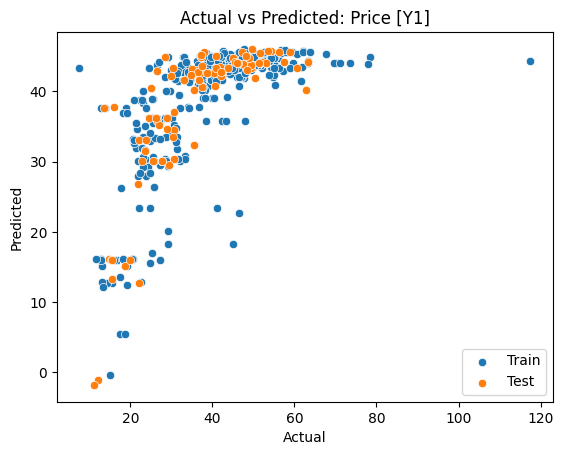

In [ ]:
ActPredPlot(y1_train, y1_test, y1_train_pred, y1_test_pred, "Price [Y1]")

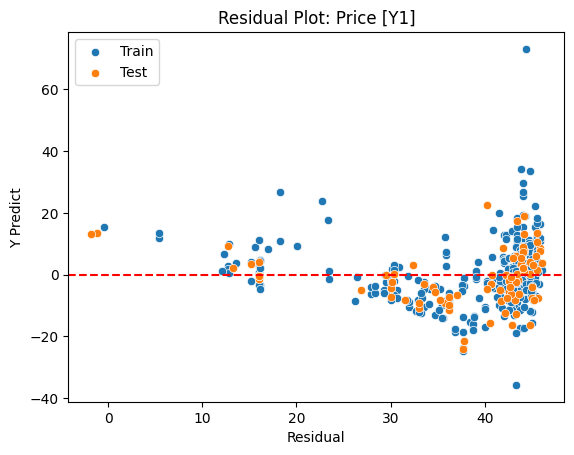

In [ ]:
ResidualPlot(y1_train, y1_test, y1_train_pred, y1_test_pred, "Price [Y1]")

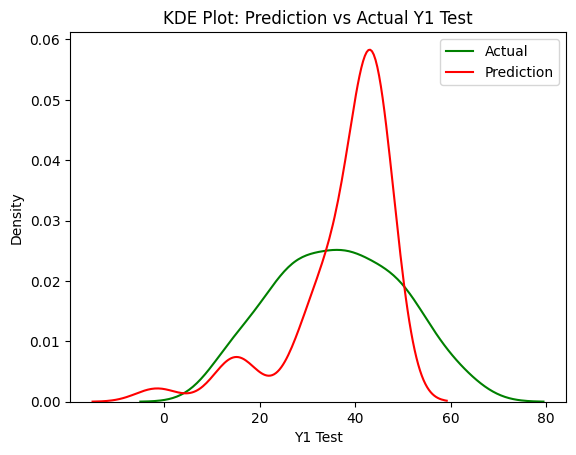

In [ ]:
KDEplot(y1_test, y1_test_pred, "Y1 Test")

In [ ]:
#Model Score Train
ModelScore(y1_train, y1_train_pred)

MSE Score: 106.8991798935223
MAE Score: 7.362195047448233
R2 Score: 0.4316609371791118


In [ ]:
#Model Score Test
ModelScore(y1_test, y1_test_pred)

MSE Score: 77.34399178518461
MAE Score: 6.920972703573579
R2 Score: 0.538959766501977


In [ ]:
# std_resid = (resid_train1 - resid_train1.mean()) / resid_train1.std()
# sns.residplot(y=std_resid, x=y1_train_pred)
# plt.title("Histogram of Standardized Residuals: Y1 Train");

### 2. Multiple Linear Regression

In [ ]:
X2 = df[['age', 'distance', 'stores', 'lat', 'lon',]]
y2 = df['price']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
y2_train_pred = model2.predict(X2_train)
y2_train_pred[:5]

array([38.33909826, 33.77517449, 33.83202309, 39.95337348, 44.32296935])

In [ ]:
y2_test_pred = model2.predict(X2_test)
y2_test_pred[:5]

array([47.74180481, 41.95484652, 44.5399885 , 41.33697932, 30.28548   ])

In [ ]:
coef2 = model2.coef_
int2 = model2.intercept_
print(f"Intercept: {int2}")
print(f"Coefficient: {coef2}")
print(f"Equation: Price = {int2} + {coef2[0]} Age + {coef2[1]} Distance + {coef2[2]} Convenience Stores + {coef2[3]} Latitude + {coef2[4]} Longitude")

Intercept: -2946.6588590244446
Coefficient: [-2.70593236e-01 -4.55249601e-03  1.10512079e+00  2.36092831e+02
 -2.39036942e+01]
Equation: Price = -2946.6588590244446 + -0.2705932358164285 Age + -0.0045524960137866815 Distance + 1.105120790962548 Convenience Stores + 236.09283090508703 Latitude + -23.903694181762624 Longitude


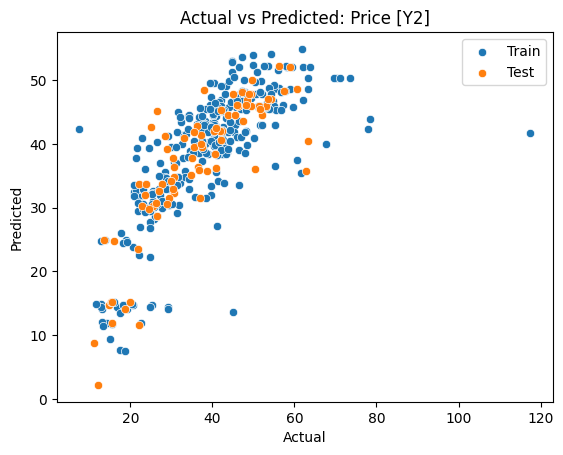

In [ ]:
ActPredPlot(y2_train, y2_test, y2_train_pred, y2_test_pred, "Price [Y2]")

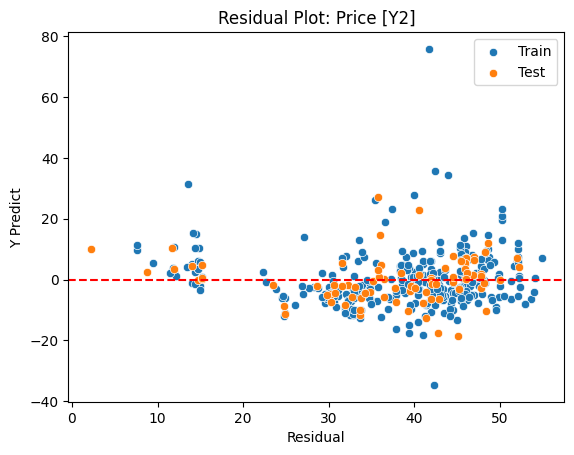

In [ ]:
ResidualPlot(y2_train, y2_test, y2_train_pred, y2_test_pred, "Price [Y2]")

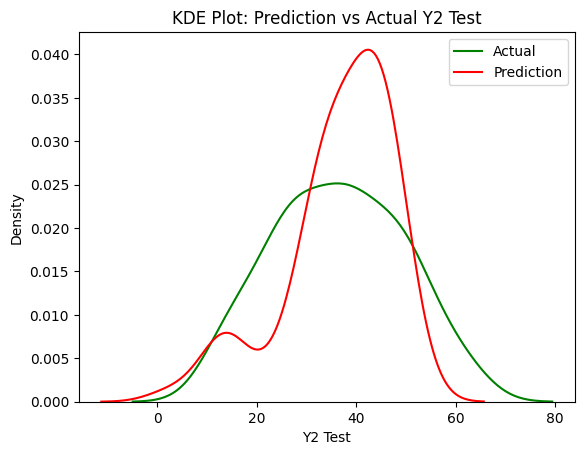

In [ ]:
KDEplot(y2_test, y2_test_pred, "Y2 Test")

In [ ]:
#Rscore Train
ModelScore(y2_train, y2_train_pred)

MSE Score: 85.43289947763147
MAE Score: 6.390228422313134
R2 Score: 0.5457883393347673


In [ ]:
#Rscore Test
ModelScore(y2_test, y2_test_pred)

MSE Score: 54.58094520086248
MAE Score: 5.350138374356204
R2 Score: 0.6746481382828156


### Test Polynomial for All Feature

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
R2_poly5_test = []
R2_poly5_train = []
feat = ['age', 'distance', 'stores', 'lat', 'lon',]
degree = range(1, 11)

for f in feat:
  X5 = df[[f]]
  y5 = df['price']
  X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
  for p in degree:
    model = make_pipeline(PolynomialFeatures(p), LinearRegression())
    model.fit(X5_train, y5_train)
    R2_poly5_test.append(model.score(X5_test, y5_test))
    R2_poly5_train.append(model.score(X5_train, y5_train))
    best_score5_train = max(R2_poly5_train)
    best_score5_test = max(R2_poly5_test)
    print(f"Feature: {f} - Degree: {p} - Score Test: {model.score(X5_test, y5_test)}")
print(f"Best Score Train: {best_score5_train}")
print(f"Best Score Test: {best_score5_test}")
print(f"R2 Score Train: {R2_poly5_train}")
print(f"R2 Score Test: {R2_poly5_test}")


Feature: age - Degree: 1 - Score Test: 0.015227904910820378
Feature: age - Degree: 2 - Score Test: 0.21899472204644388
Feature: age - Degree: 3 - Score Test: 0.2264711705265262
Feature: age - Degree: 4 - Score Test: 0.22571193373160048
Feature: age - Degree: 5 - Score Test: 0.21929510027723442
Feature: age - Degree: 6 - Score Test: 0.21162681349123047
Feature: age - Degree: 7 - Score Test: 0.21536159831592305
Feature: age - Degree: 8 - Score Test: 0.2186662331621504
Feature: age - Degree: 9 - Score Test: 0.21921952095129482
Feature: age - Degree: 10 - Score Test: 0.22923741478759307
Feature: distance - Degree: 1 - Score Test: 0.538959766501977
Feature: distance - Degree: 2 - Score Test: 0.586531704676295
Feature: distance - Degree: 3 - Score Test: 0.6352335435599594
Feature: distance - Degree: 4 - Score Test: 0.6442822720376669
Feature: distance - Degree: 5 - Score Test: 0.5291795249785176
Feature: distance - Degree: 6 - Score Test: 0.44763247025390207
Feature: distance - Degree: 7 - S

In [ ]:
R2_poly5_test = []
R2_poly5_train = []
feat = ['age', 'distance', 'stores', 'lat', 'lon',]
degree = range(1, 11)

best_feature = None
best_degree = None
best_test5_score = -float('inf')
best_train5_score = -float('inf')

for f in feat:
    X5 = df[[f]]
    y5 = df['price']
    X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
    for p in degree:
        model = make_pipeline(PolynomialFeatures(p), LinearRegression())
        model.fit(X5_train, y5_train)
        R2_test5_score = model.score(X5_test, y5_test)
        R2_train5_score = model.score(X5_train, y5_train)
        R2_poly5_test.append(R2_test5_score)
        R2_poly5_train.append(R2_train5_score)
        # print(f"Feature: {f} - Degree: {p} - Score Test: {test_score} - Score Train: {train_score}")

        if R2_test5_score > best_test5_score:
            best_test5_score = R2_test5_score
            best_train5_score = R2_train5_score
            best_feature5 = f
            best_degree5 = p

print(f"Best test score: {best_test5_score}")
print(f"Best train score: {best_train5_score}")
print(f"Best feature: {best_feature5}")
print(f"Best degree: {best_degree5}")

Best test score: 0.6442822720376669
Best train score: 0.5465363700015404
Best feature: distance
Best degree: 4


In [ ]:
# plt.plot(range(1, 11), R2_poly5_test, label="Test")
# plt.plot(range(1, 11), R2_poly5_train, label="Train")
# plt.legend()
# plt.title("R2 Score vs Degree")
# plt.xlabel("Degree")
# plt.ylabel("R2 Score");

### 3. Polynomial Regression

In [ ]:
X3 = df[['distance']]
y3 = df['price']

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
R2_poly3_test = []
R2_poly3_train = []

for p in range(1, 11):
  model3 = make_pipeline(PolynomialFeatures(p), LinearRegression())
  model3.fit(X3_train, y3_train)
  R2_poly3_test.append(model3.score(X3_test, y3_test))
  R2_poly3_train.append(model3.score(X3_train, y3_train))

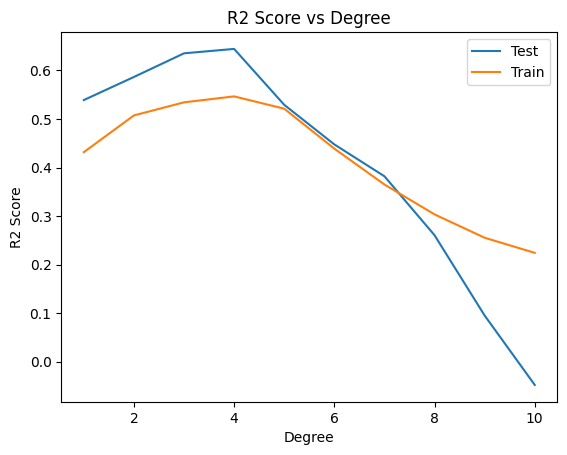

In [ ]:
plt.plot(range(1, 11), R2_poly3_test, label="Test")
plt.plot(range(1, 11), R2_poly3_train, label="Train")
plt.legend()
plt.title("R2 Score vs Degree")
plt.xlabel("Degree")
plt.ylabel("R2 Score");

In [ ]:
model3 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model3.fit(X3_train, y3_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [ ]:
print(model3)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])


In [ ]:
y3_train_pred = model3.predict(X3_train)
y3_train_pred[:5]

array([54.21762094, 26.4151797 , 26.46014825, 41.10565891, 37.85101328])

In [ ]:
y3_test_pred = model3.predict(X3_test)
y3_test_pred[:5]

array([49.40591061, 41.02520557, 46.86814491, 50.18800596, 26.44894251])

In [ ]:
f5 = np.polyfit(X3.squeeze(), y3, 4)
p5 = np.poly1d(f5)
print(p5)

           4            3             2
2.621e-13 x - 3.74e-09 x + 1.809e-05 x - 0.03794 x + 55.62


In [ ]:
def PollyPlot2(xtrain, xtest, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(8, 6))

    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)

    sns.scatterplot(x=xtrain, y=y_train, label='Training Data')
    sns.scatterplot(x=xtest, y=y_test, color='orange', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), color='red', label='Predicted Function')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Distance')
    plt.xlabel('Distance in Sq.ft')
    plt.ylabel('Price')
    plt.legend();

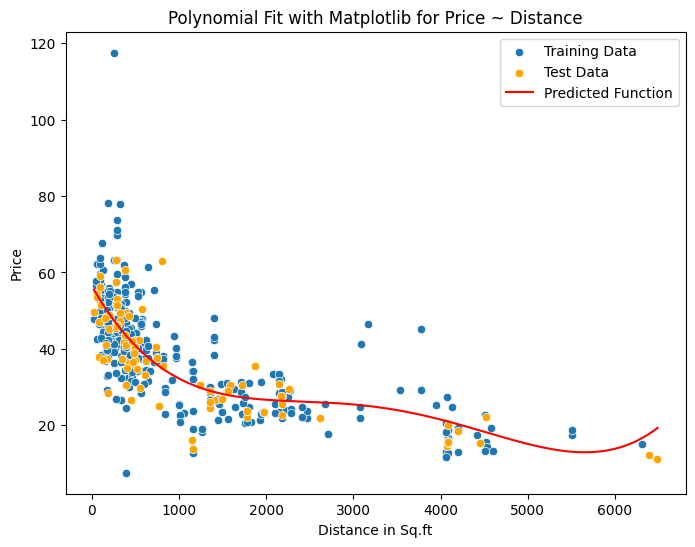

In [ ]:
PollyPlot2(X3_train.squeeze(), X3_test.squeeze(), y3_train, y3_test, model3.named_steps['linearregression'], model3.named_steps['polynomialfeatures'])

In [ ]:
def PlotPolly(model, xtrain, xtest, ytrain, ytest, Name):
    x_new = np.linspace(0, 6500, 100)
    y_new = model(x_new)

    sns.scatterplot(x=xtrain, y=ytrain, color="blue", label="Data Training")
    sns.scatterplot(x=xtest, y=ytest, color="yellow", label="Data Testing")
    plt.plot(x_new, y_new, color="red", label="Polynomial Fit")
    plt.title('Polynomial Fit with Matplotlib for Price ~ Distance')
    plt.xlabel(Name)
    plt.ylabel('Distance')
    plt.legend();

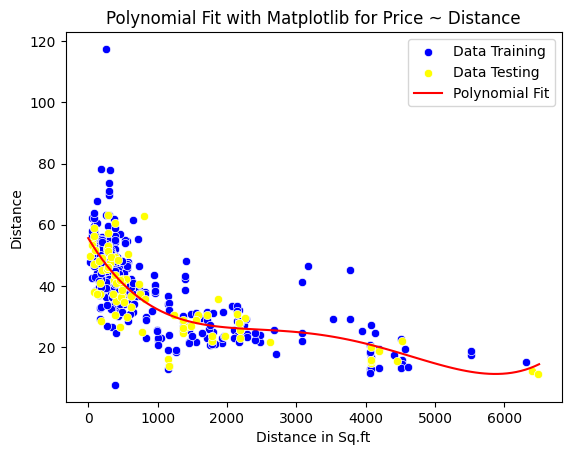

In [ ]:
PlotPolly(p5, X3_train.squeeze(), X3_test.squeeze(), y3_train, y3_test, 'Distance in Sq.ft')

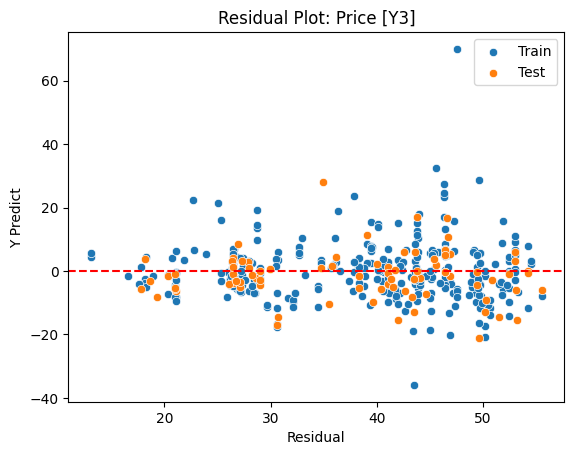

In [ ]:
ResidualPlot(y3_train, y3_test, y3_train_pred, y3_test_pred, "Price [Y3]")

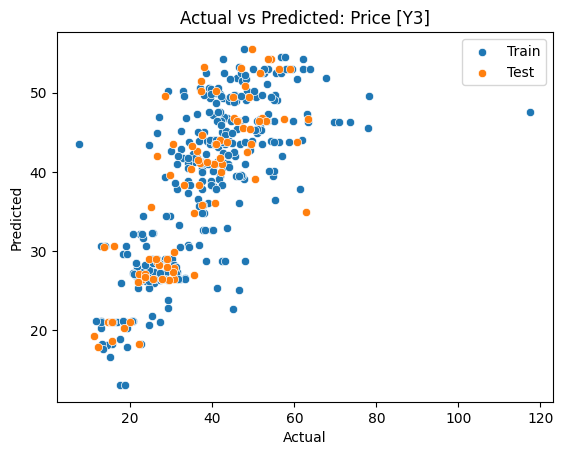

In [ ]:
ActPredPlot(y3_train, y3_test, y3_train_pred, y3_test_pred, "Price [Y3]")

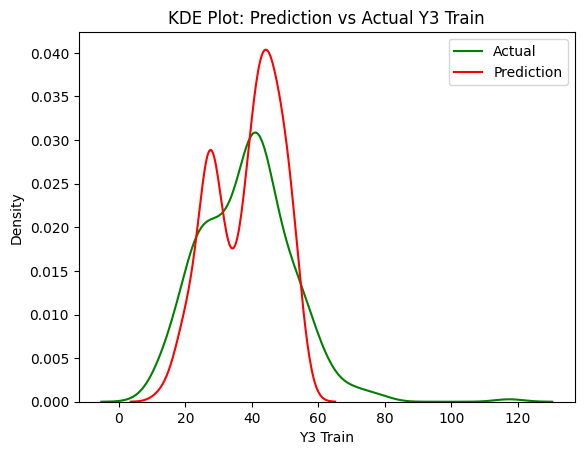

In [ ]:
KDEplot(y3_train, y3_train_pred, "Y3 Train")

In [ ]:
#Model Score Train
ModelScore(y3_train, y3_train_pred)

MSE Score: 85.29220201366276
MAE Score: 6.402510269147726
R2 Score: 0.5465363700015404


In [ ]:
#Model Score Test
ModelScore(y3_test, y3_test_pred)

MSE Score: 59.67511516428468
MAE Score: 5.575936833075459
R2 Score: 0.6442822720376669


### 4. Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
X4 = df[['age', 'distance', 'stores', 'lat', 'lon',]]
y4 = df['price']

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [ ]:
Rid = Ridge()

In [ ]:
CV = GridSearchCV(estimator=Rid, param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}, cv=5)
CV.fit(X4_train, y4_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                                   100000]})

In [ ]:
Best_CV = CV.best_estimator_

In [ ]:
Best_CV.fit(X4_train, y4_train)

Ridge(alpha=0.01)

In [ ]:
y4_train_pred = Best_CV.predict(X4_train)
y4_train_pred[:5]

array([38.86096287, 33.91499651, 33.7868515 , 40.24433876, 44.28148664])

In [ ]:
y4_test_pred = Best_CV.predict(X4_test)
y4_test_pred[:5]

array([48.18260448, 42.34466127, 44.29498988, 41.20865423, 30.26272799])

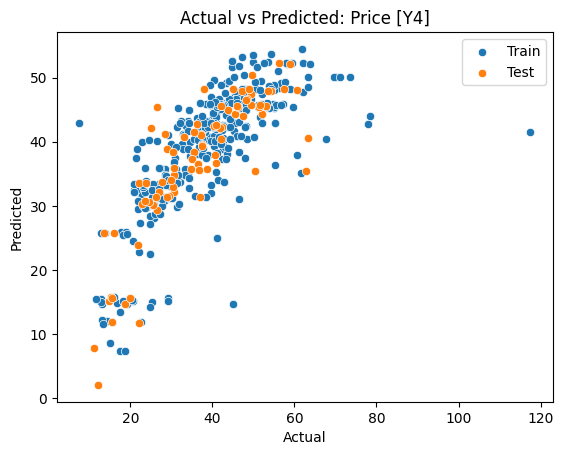

In [ ]:
ActPredPlot(y4_train, y4_test, y4_train_pred, y4_test_pred, "Price [Y4]")

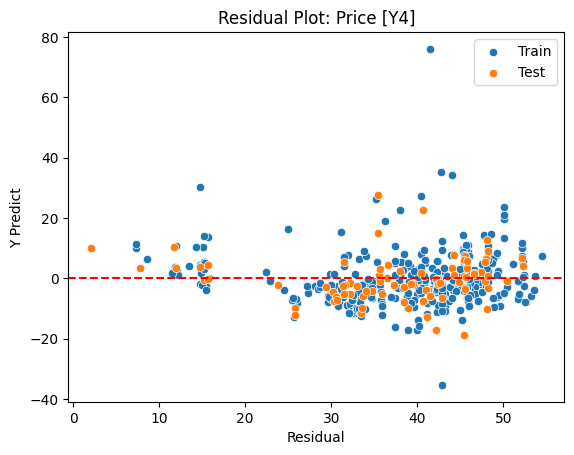

In [ ]:
ResidualPlot(y4_train, y4_test, y4_train_pred, y4_test_pred, "Price [Y4]")

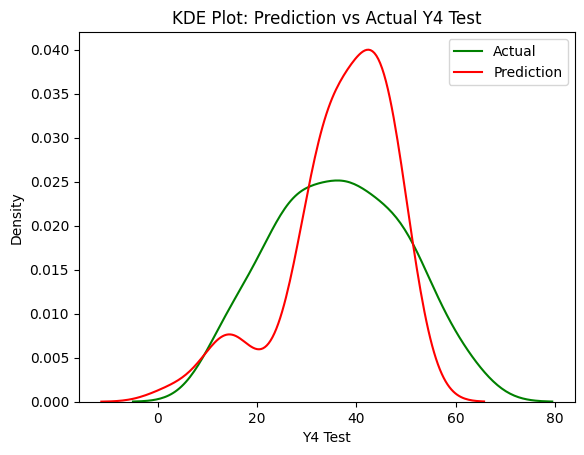

In [ ]:
KDEplot(y4_test, y4_test_pred, "Y4 Test")

In [ ]:
#Model Score Train
ModelScore(y4_train, y4_train_pred)

MSE Score: 85.72999539967469
MAE Score: 6.426680178017609
R2 Score: 0.5442088022600196


In [ ]:
#Model Score Test
ModelScore(y4_test, y4_test_pred)

MSE Score: 54.78922781643978
MAE Score: 5.3833445400731845
R2 Score: 0.67340658527394


### Score Comparation

In [ ]:
#Test Score Simple Linear Regression
ModelScore(y1_test, y1_test_pred)

MSE Score: 77.34399178518461
MAE Score: 6.920972703573579
R2 Score: 0.538959766501977


In [ ]:
#Test Score Multiple Linear Regression
ModelScore(y2_test, y2_test_pred)

MSE Score: 54.58094520086248
MAE Score: 5.350138374356204
R2 Score: 0.6746481382828156


In [ ]:
#Test Score Polynomial Regression
ModelScore(y3_test, y3_test_pred)

MSE Score: 59.67511516428468
MAE Score: 5.575936833075459
R2 Score: 0.6442822720376669


In [ ]:
#Test Score Ridge Regression
ModelScore(y4_test, y4_test_pred)

MSE Score: 54.78922781643978
MAE Score: 5.3833445400731845
R2 Score: 0.67340658527394


The best model for this data is using Multiple Linear Regression. Because it has smallest MSE & MAE, and it has largest R2 Score.

MSE Score: 54.58094520086248,
MAE Score: 5.350138374356204,
R2 Score: 0.6746481382828156.

### Prediction

In [ ]:
feat = X2_train.columns
coef = model2.coef_
intercept = model2.intercept_
print(f"Intercept: {intercept}")
print(f"Coefficient: {coef}")
feature_importance = pd.DataFrame({'Feature': feat, 'Coefficient': coef})
feature_importance.sort_values(by='Coefficient', ascending=False)


Intercept: -2946.6588590244446
Coefficient: [-2.70593236e-01 -4.55249601e-03  1.10512079e+00  2.36092831e+02
 -2.39036942e+01]


,Feature,Coefficient
3,lat,236.092831
2,stores,1.105121
1,distance,-0.004552
0,age,-0.270593
4,lon,-23.903694


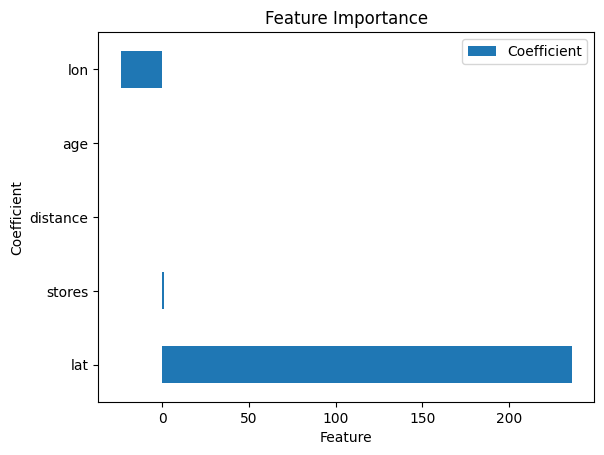

In [ ]:
feature_importance.sort_values(by='Coefficient', ascending=False).plot(kind='barh', x='Feature', y='Coefficient', title='Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient');

In [ ]:
#Lat Lon Limit
print("Min Latitude:", df['lat'].min())
print("Max Latitude:", df['lat'].max())
print("Min Longiude:", df['lon'].min())
print("Max Longiude:", df['lon'].max())


Min Latitude: 24.93207
Max Latitude: 25.01459
Min Longiude: 121.47353
Max Longiude: 121.56627


In [ ]:
def make_prediction(age, distance, stores, lat, lon):
    data = {
        "age": age,
        "distance": distance,
        "stores": stores,
        "lat": lat,
        "lon": lon,
    }
    df = pd.DataFrame(data,index=[0])
    # return df
    prediction = (model2.predict(df)[0] * 10000).round(2)
    return f"Predicted real estate price in Xindian District, Taipei, Taiwan: {prediction} NTD (New Taiwan Dollar)"

In [ ]:
make_prediction(18, 5, 3, 25.000, 121.503)

'Predicted real estate price in Xindian District, Taipei, Taiwan: 497132.81 NTD (New Taiwan Dollar)'

In [ ]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [ ]:
interact(
    make_prediction,
    age=IntSlider(
        min=df["age"].min(),
        max=df["age"].max(),
        value=df["age"].mean(),
    ),
    distance=IntSlider(
        min=df["distance"].min(),
        max=df["distance"].max(),
        value=df["distance"].mean(),
    ),
    stores=IntSlider(
        min=df["stores"].min(),
        max=df["stores"].max(),
        value=df["stores"].mean(),
    ),
    lat=FloatSlider(
        min=df["lat"].min(),
        max=df["lat"].max(),
        step=0.01,
        value=df["lat"].mean(),
    ),
    lon=FloatSlider(
        min=df["lon"].min(),
        max=df["lon"].max(),
        step=0.01,
        value=df["lon"].mean(),
    ),
    # neighborhood=Dropdown(options=sorted(X_train["neighborhood"].unique())),
);

interactive(children=(IntSlider(value=17, description='age', max=43), IntSlider(value=1083, description='dista…